In [91]:
## Lets import some important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot
sns.set(style='white', context='notebook', palette='deep')
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [92]:
df= pd.read_csv(r"C:\Users\Homa\baseball.csv")

In [93]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [94]:
## Let's rename the columns name for better visibility
df.rename(columns = {'W':'Number of predicted wins'}, inplace = True)
df.rename(columns = {'R':'Runs'}, inplace = True)
df.rename(columns = {'AB':'At Bats'}, inplace = True)
df.rename(columns = {'H':'Hits'}, inplace = True)
df.rename(columns = {'2B':'Doubles'}, inplace = True)
df.rename(columns = {'3B':'Triples'}, inplace = True)
df.rename(columns = {'HR':'Homeruns'}, inplace = True)
df.rename(columns = {'BB':'Walks'}, inplace = True)
df.rename(columns = {'SO':'Strikeouts'}, inplace = True)
df.rename(columns = {'SB':'Stolen Bases'}, inplace = True)
df.rename(columns = {'RA':'Runs Allowed'}, inplace = True)
df.rename(columns = {'ER':'Earned Runs'}, inplace = True)
df.rename(columns = {'ERA':' Earned Run Average'}, inplace = True)
df.rename(columns = {'SHO':'Shutouts'}, inplace = True)
df.rename(columns = {'CG':'Complete Games'}, inplace = True)
df.rename(columns = {'SV':'Saves'}, inplace = True)
df.rename(columns = {'E':'Errors'}, inplace = True)

In [95]:
df.shape

(30, 17)

In [96]:
df.describe()

,Number of predicted wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [97]:
df.head()
df.shape

(30, 17)

In [98]:
##There is no null value as each columns have 30 data and all of them are continous.

In [99]:
##Lets divide data into two features(x) and Label(y)
x=df.drop("Number of predicted wins", axis=1)
y=df['Number of predicted wins']
df.head()

,Number of predicted wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


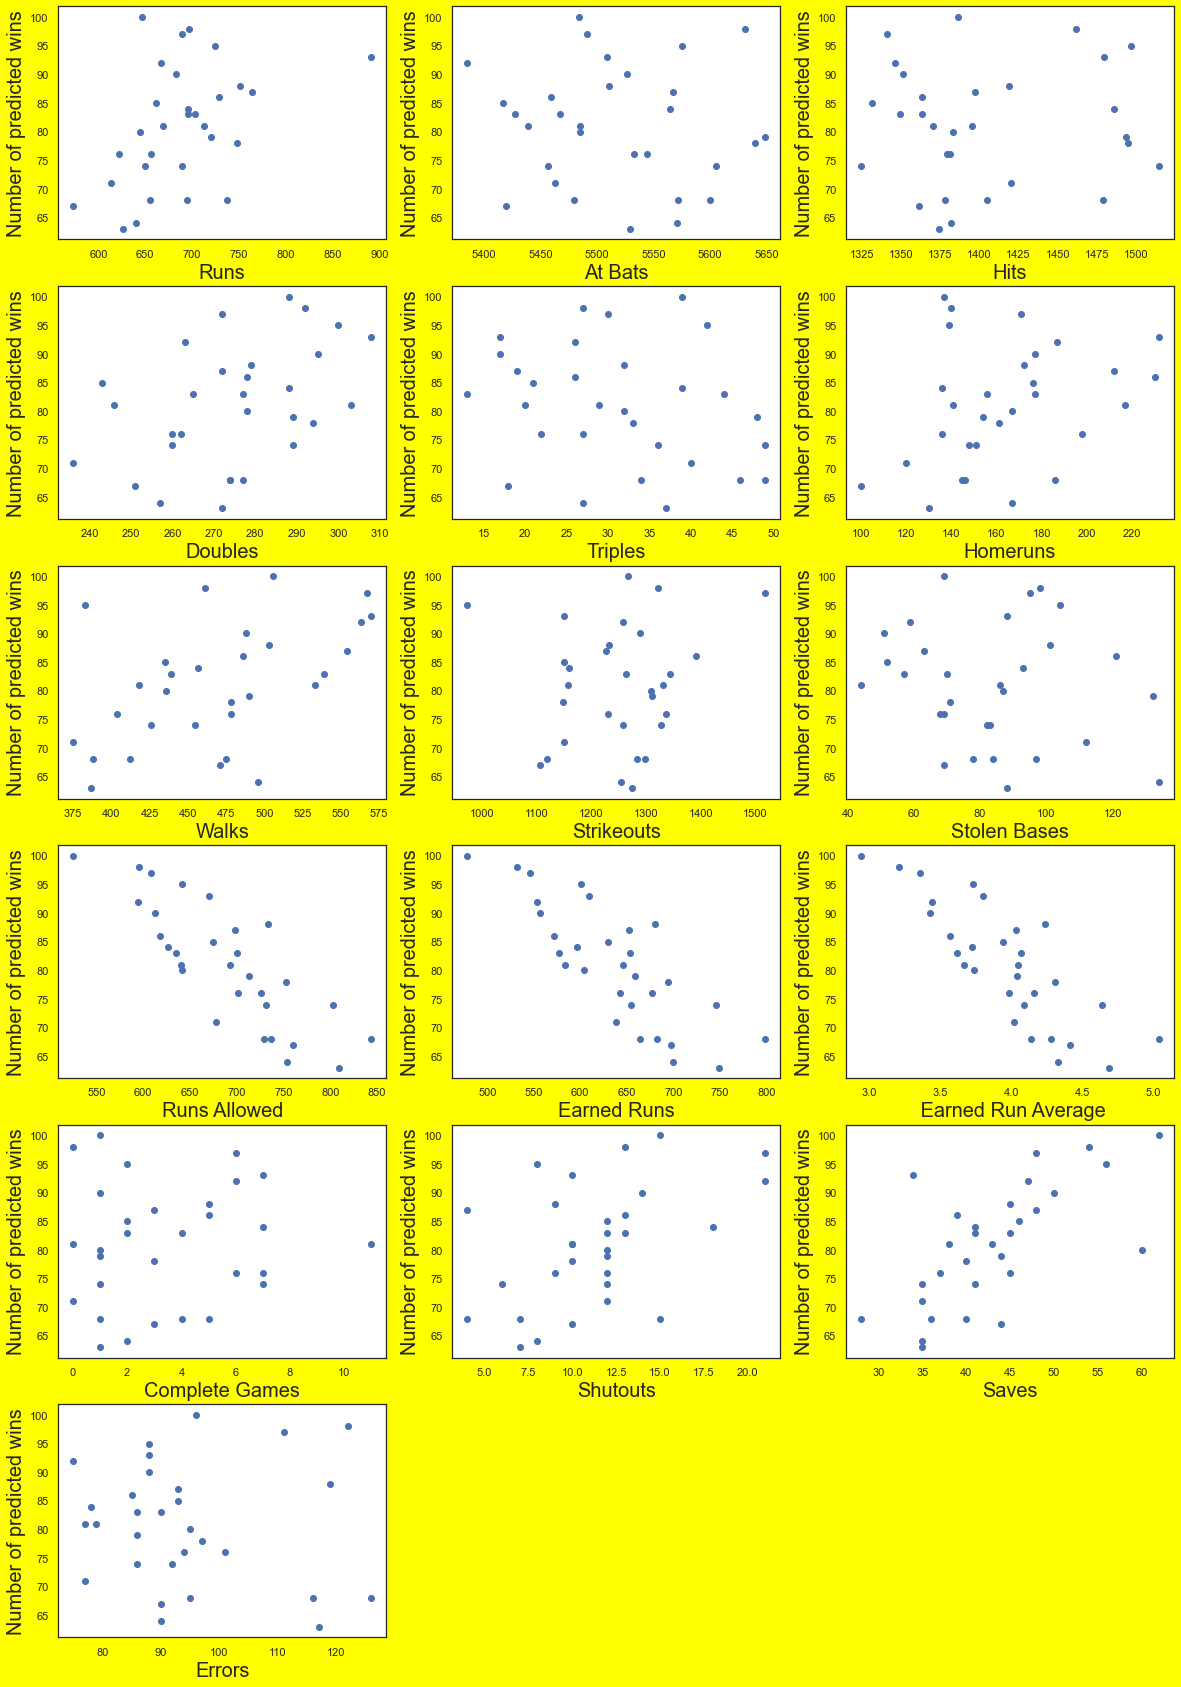

In [100]:
plt.figure(figsize=(20,30),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Number of predicted wins',fontsize=20)
        
        plotnumber+=1
        
plt.show()

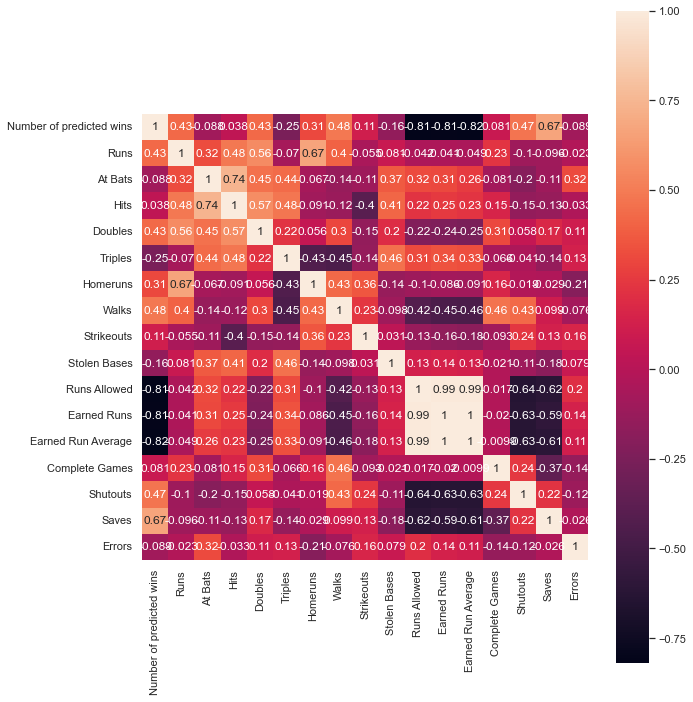

In [101]:
plt.figure(figsize=(10, 12))
sns.heatmap(df.corr(method='pearson'), annot=True, square=True)
plt.show()

In [102]:
##Lets remove unwanted  columns with less correlation
df.drop('At Bats',
             axis = 1,
             inplace = True)
df.drop('Hits',
             axis = 1,
             inplace = True)
df.drop('Triples',
             axis = 1, 
             inplace = True)
df.drop('Stolen Bases', 
             axis = 1,
             inplace = True)
df.drop('Errors', 
             axis = 1,
             inplace = True)

In [103]:
## Lets check how data is distributed. 

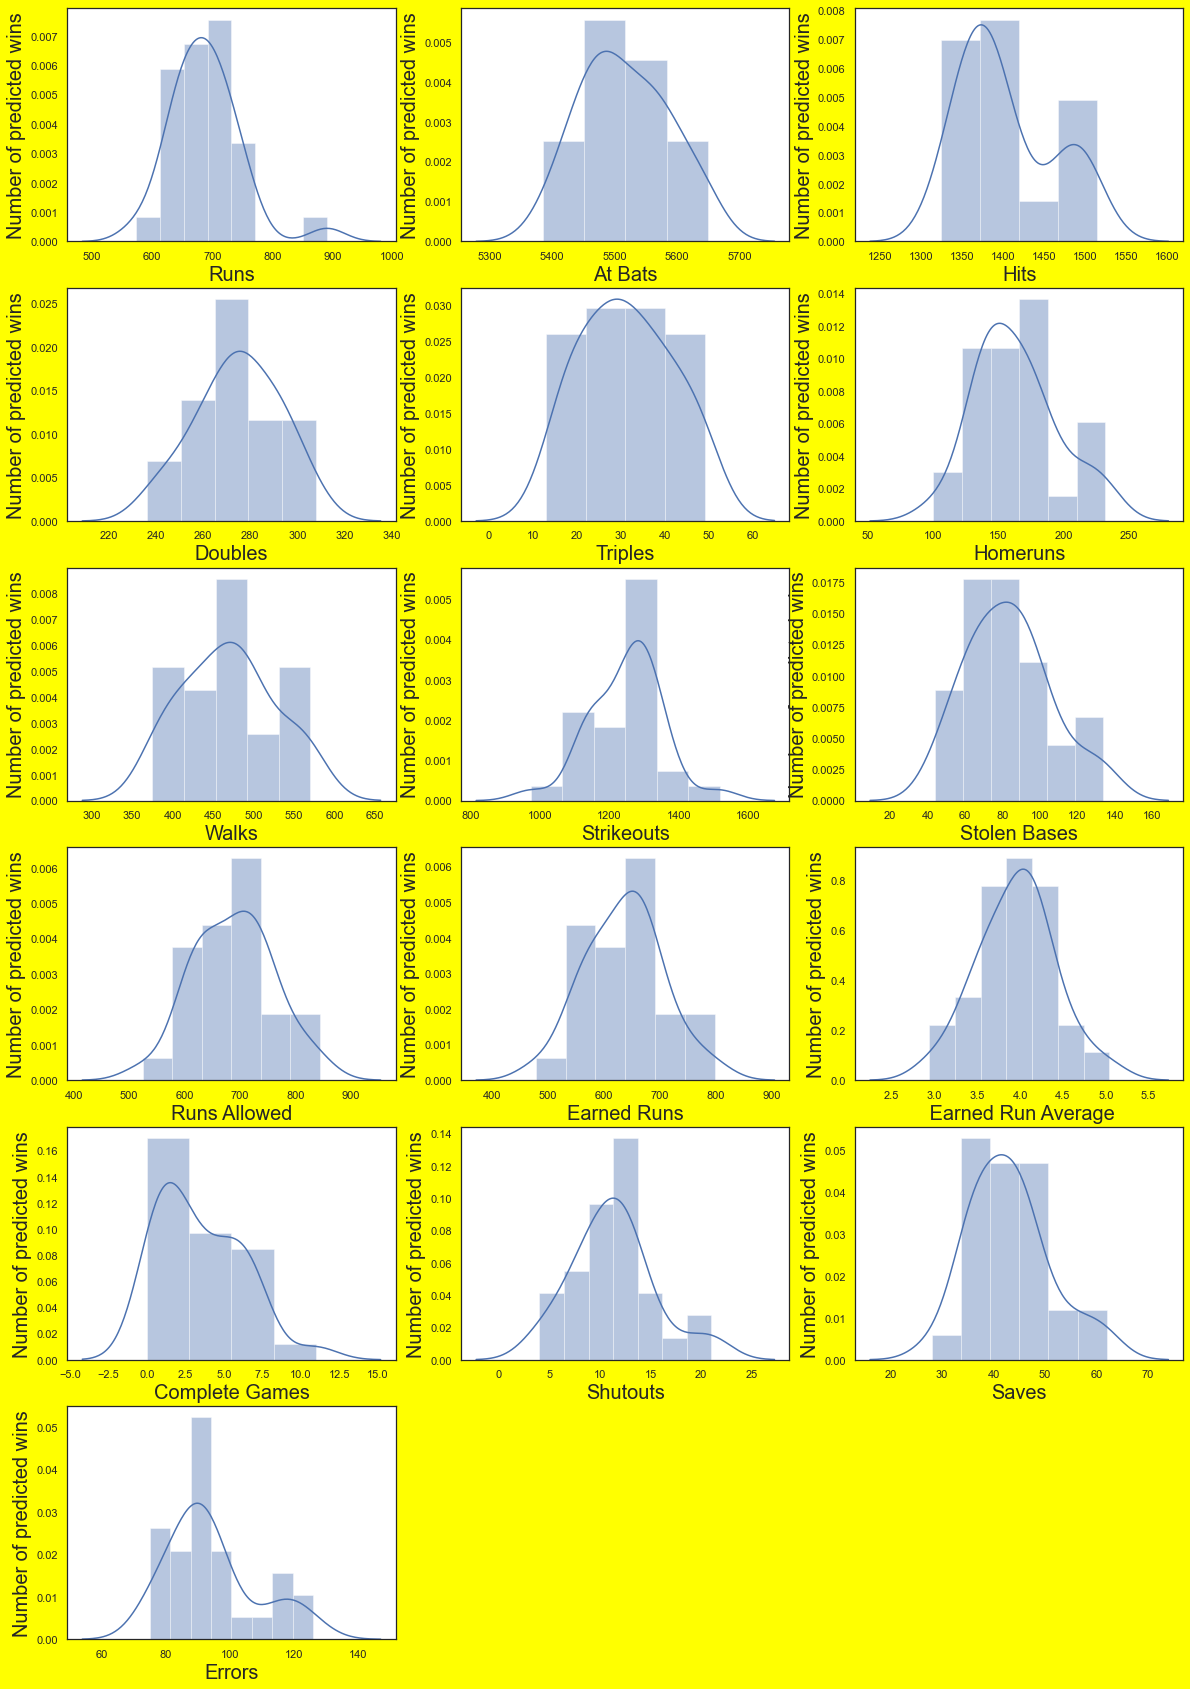

In [104]:
plt.figure(figsize=(20,30),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
        plt.ylabel('Number of predicted wins',fontsize=20)
        plotnumber+=1
        
plt.show()

In [105]:
df.skew()

Number of predicted wins    0.047089
Runs                        1.200786
Doubles                    -0.230650
Homeruns                    0.516441
Walks                       0.158498
Strikeouts                 -0.156065
Runs Allowed                0.045734
Earned Runs                 0.058710
 Earned Run Average         0.053331
Complete Games              0.736845
Shutouts                    0.565790
Saves                       0.657524
dtype: float64

In [106]:
from scipy.stats import skew

In [107]:
df['Complete Games']=np.sqrt(df['Complete Games'])
df['Saves']=np.sqrt(df['Saves'])
df['Runs']=np.log(df['Runs'])

In [108]:
df.skew()

Number of predicted wins    0.047089
Runs                        0.744196
Doubles                    -0.230650
Homeruns                    0.516441
Walks                       0.158498
Strikeouts                 -0.156065
Runs Allowed                0.045734
Earned Runs                 0.058710
 Earned Run Average         0.053331
Complete Games             -0.311476
Shutouts                    0.565790
Saves                       0.410288
dtype: float64

In [109]:
## Let Normalize skewed continous data
print(skew(df['Runs']))
print(skew(df['Complete Games']))
print(skew(df['Shutouts']))
print(skew(df['Saves']))


0.7064566610352074
-0.2956808707860975
0.5370985776239573
0.38948215374404827


In [110]:
df.head()

,Number of predicted wins,Runs,Doubles,Homeruns,Walks,Strikeouts,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves
0,95,6.584791,300,139,383,973,641,601,3.73,1.414214,8,7.483315
1,83,6.545350,277,156,439,1264,700,653,4.07,1.414214,12,6.708204
2,81,6.505784,303,141,533,1157,640,584,3.67,3.316625,10,6.164414
3,76,6.432940,260,136,404,1231,701,643,3.98,2.645751,9,6.082763
4,74,6.535241,289,151,455,1259,803,746,4.64,2.645751,12,5.916080


Number of predicted wins        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Runs                         AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Doubles                       AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Homeruns                     AxesSubplot(0.606034,0.71587;0.133621x0.16413)
Walks                        AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Strikeouts                     AxesSubplot(0.125,0.518913;0.133621x0.16413)
Runs Allowed                AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Earned Runs                  AxesSubplot(0.44569,0.518913;0.133621x0.16413)
 Earned Run Average         AxesSubplot(0.606034,0.518913;0.133621x0.16413)
Complete Games              AxesSubplot(0.766379,0.518913;0.133621x0.16413)
Shutouts                       AxesSubplot(0.125,0.321957;0.133621x0.16413)
Saves                       AxesSubplot(0.285345,0.321957;0.133621x0.16413)
dtype: object

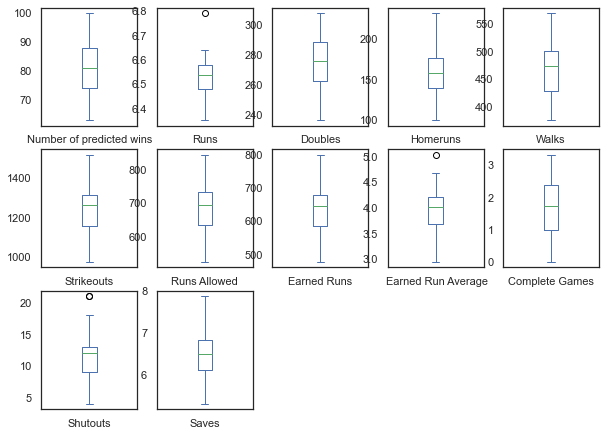

In [111]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(10,10))

In [112]:
## We cansee there are outlier in some of columns. it is very less in number. Still I am using zscore method to remove outliers.

from scipy.stats import zscore
z= np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [113]:
df= df[(z<3).all(axis=1)]
df.shape

(29, 12)

In [114]:
Data_loss=((30-29)/30)*100

Data_loss

3.3333333333333335

In [115]:
##We can see data loss is just 3.33%. we can accept this data.

In [116]:
## Lets do scaling to avoid partiality by model on the basis of number size.
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
x_scaled=Scaler.fit_transform(x)

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,1638.985029,Runs
1,4277.157018,At Bats
2,4698.798408,Hits
3,904.439835,Doubles
4,32.435486,Triples
5,285.773237,Homeruns
6,269.485018,Walks
7,398.234104,Strikeouts
8,28.654970,Stolen Bases
9,17204.829356,Runs Allowed


In [118]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,1638.985029,Runs
1,4277.157018,At Bats
2,4698.798408,Hits
3,904.439835,Doubles
4,32.435486,Triples
5,285.773237,Homeruns
6,269.485018,Walks
7,398.234104,Strikeouts
8,28.654970,Stolen Bases
9,17204.829356,Runs Allowed


In [119]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [125]:
from sklearn.linear_model import  LinearRegression

lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lr.fit(x_train,y_train)
    lr_predict_train=lr.predict(x_train)
    lr_predict_test=lr.predict(x_test)
    print(f'At random state{i}, The training accuracy is :-{r2_score(y_train,lr_predict_train)}')
    print(f'At random state{i}, The test accuracy is :-{r2_score(y_test,lr_predict_test)}')
    print('\n')


At random state0, The training accuracy is :-0.9681348515901735
At random state0, The test accuracy is :-0.3703799193209145


At random state1, The training accuracy is :-0.9733856732704862
At random state1, The test accuracy is :-0.33060984367410773


At random state2, The training accuracy is :-0.9937308934727275
At random state2, The test accuracy is :--2.405551706592453


At random state3, The training accuracy is :-0.9733765745975087
At random state3, The test accuracy is :-0.5683741160453148


At random state4, The training accuracy is :-0.9664066038869364
At random state4, The test accuracy is :-0.28682960380033373


At random state5, The training accuracy is :-0.9508521861901349
At random state5, The test accuracy is :-0.7359925713179839


At random state6, The training accuracy is :-0.9489496261745087
At random state6, The test accuracy is :-0.8374394125305838


At random state7, The training accuracy is :-0.9695004701946728
At random state7, The test accuracy is :-0.044069067

In [126]:
##Splitting data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=99)

In [127]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [128]:
print(lr.score(x_train,y_train))
lr_predict=lr.predict(x_test)

0.9635549333014959


In [129]:
##Lets check how well model fits the trained data
from sklearn.metrics import r2_score

print('r2_score:',r2_score(lr_predict,y_test))


r2_score: 0.7975133970134561


In [130]:
## ##Lets check how well model fits the test data
lr.score(x_train,y_train)

0.9635549333014959

In [131]:
y_pred= lr.predict(x_test)
y_pred

array([61.31305574, 55.93032308, 96.11672748, 77.91629853, 84.96103041,
       85.94114262, 80.45848332])

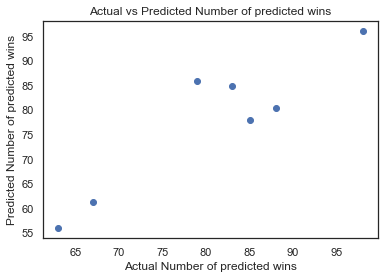

In [132]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Number of predicted wins')
plt.ylabel('Predicted Number of predicted wins')
plt.title("Actual vs Predicted Number of predicted wins")
plt.show()

In [133]:
## Doing Model Evaluation by Mean square Error
mean_squared_error(y_test,y_pred)

34.992397646483234

In [134]:
mean_absolute_error(y_test,y_pred)

5.452469266390977

In [135]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

5.915437232063513

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
from sklearn import metrics
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
z=GridSearchCV(ls,parameters)
z.fit(x_train,y_train)
print(z.best_params_)

{'alpha': 10, 'random_state': 0}


In [137]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7485157304445944
MSE: 31.604900651473223
MAE: 5.294312940144981
RMSE: 5.621823605510335


In [138]:
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
z_=GridSearchCV(rd,parameters)
z_.fit(x_train,y_train)
print(z_.best_params_)


{'alpha': 10, 'solver': 'saga'}


In [139]:
rd=Ridge(alpha=10,solver='saga')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.6675234782407404
MSE: 41.7834779794596
MAE: 6.005717824087469
RMSE: 6.46401407636614


In [140]:
## Conclusions
## I have done EDA using Pandas and other plotting libraries.
## Also made use of packages like matplotlib, plotly and seaborn to develop better insights about the data.
## I also learnt how to create new features which will in turn help us to better predict the survival.
## I get to know what are the features on which price is highly positively and negatively coorelated with.
## I came to know through analysis which model will be work with better accuracy with the help of r2 score, MSE, MAE and RMSE scores.
##  use Linear models to fine tune the predictions.


In [142]:
print ("              #################### End of Project ###################           ")

              #################### End of Project ###################           
